## Project Planning Stage (Individual)
**Group: 19**   
**Section: 003**  
**Name: Finn Piney #46957874**  

### Loading Libraries and Datasets

In [3]:
# Loading libraries
library(tidyverse)
library(repr)
library(tidymodels)

# Loading the two datasets directly from their URL's on Github in order to have the full file be reproducible
url_players <- "https://raw.githubusercontent.com/Finnypiney/individual_project_finnp/refs/heads/main/players.csv"
url_sessions <- "https://raw.githubusercontent.com/Finnypiney/individual_project_finnp/refs/heads/main/sessions.csv"

players <- read_csv(url_players)
sessions <- read_csv(url_sessions)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


### (1) Data Description + Summary Table (for players.csv)

In [10]:
# PLAYERS SUMMARY STATISTICS
summary_players <- summary(players) #simple data summary just to see what the variables are

experience_categories <- unique(players$experience) #this is to check what the experience categories are
gender_categories <- unique(players$gender) #this is to check what the gender categories are

summary_table <- data.frame(Variable = c("Age", "played_hours"),
Mean = round(c(mean(players$Age, na.rm = TRUE),
        mean(players$played_hours, na.rm = TRUE)), 2),
Min = round(c(min(players$Age, na.rm = TRUE),
        min(players$played_hours, na.rm = TRUE)), 2),
Max = round(c(max(players$Age, na.rm = TRUE),
        max(players$played_hours, na.rm = TRUE)), 2)) #this is the summary table for our quantitative variables


summary_players
experience_categories
gender_categories
print(summary_table)

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

[1] "Pro"      "Veteran"  "Amateur"  "Regular"  "Beginner"

[1] "Male"              "Female"            "Non-binary"       
[4] "Prefer not to say" "Agender"           "Two-Spirited"     
[7] "Other"

      Variable  Mean Min   Max
1          Age 21.14   9  58.0
2 played_hours  5.85   0 223.1


**Players:** in the players.csv dataset, we have
- 196 rows (196 observations)
- 7 variables
  - experience
    - Character variable that indicates a player's level of MineCraft experience (5 unique categories).
  - subscribe
    - Logical variable (true or false) for whether a player is subscribed to a game-related newsletter.
  - hashedEmail
    - Character variable for a player's hashed email address.
  - played_hours
    - Double variable for the number of MineCraft hours played by each individual.
  - name
    - Character variable for a player's first name.
  - gender
    - Character variable for gender (7 unique categories).
  - Age
    - Double variable for age.

**Issues:**
- In the Age variable, 2 observations are NA's, meaning that when we compute summary statistics/wrangle our data we should be careful to account for this using na.rm = TRUE.

**NOTE:** As instructed by professors, since sessions.csv is not used in my analysis, it is not summarized.

### (2) Questions

**Broad question chosen:** (Question 1) What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?  

**Specific question chosen:** Can an individual's age and hours played of Minecraft in this dataset help predict whether or not they are subscribed to a game-related newsletter? Does the predictive strength of these two variables change if we compare across groups, defined by Minecraft experience level?  

Discussion of data preparation/wrangling to answer this question is included in the methods section.

### (3) Exploratory Data Analysis and Visualization

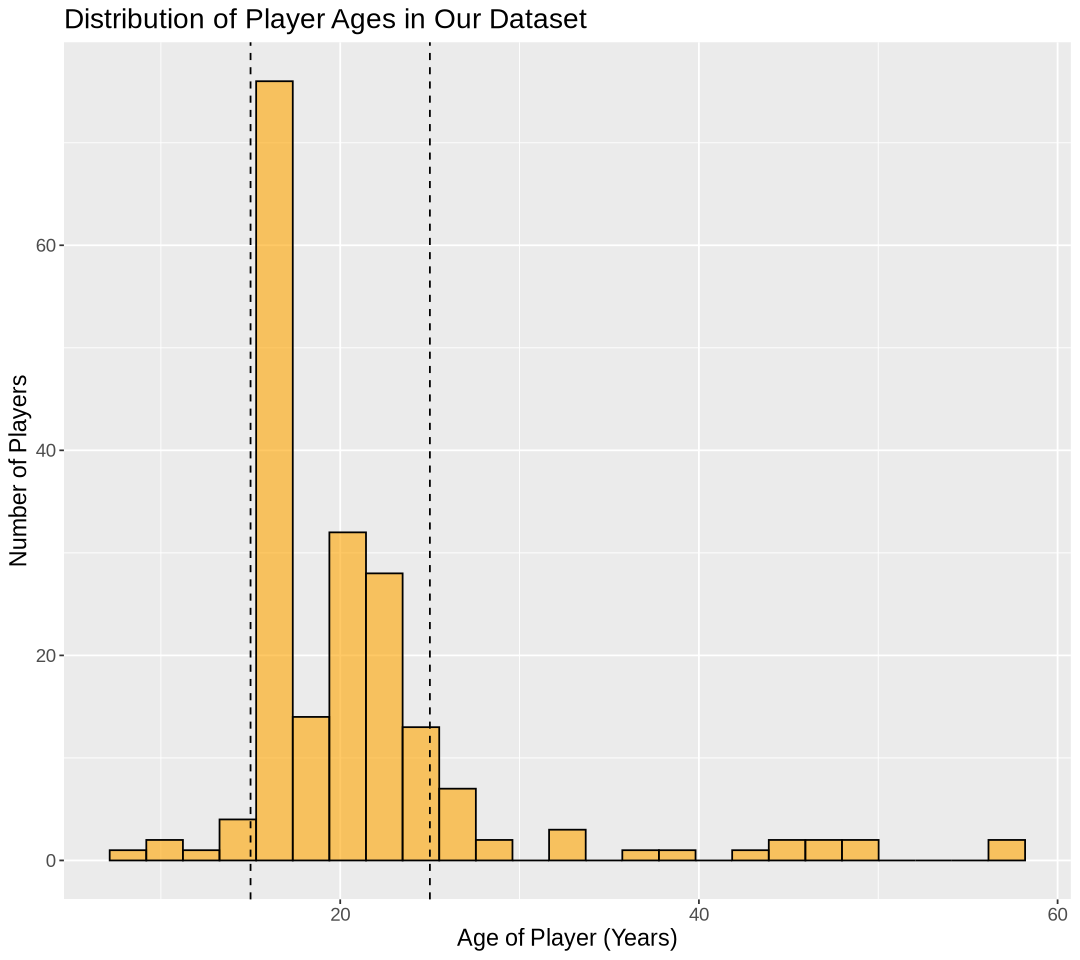

In [19]:
options(repr.plot.width = 9, repr.plot.height = 8)

age_dist_plot <- ggplot(players, aes(x = Age)) +
  geom_histogram(alpha = 0.6, color = "black", fill = "orange", bins = 25, na.rm = TRUE) +
  labs(
    x = "Age of Player (Years)",
    y = "Number of Players",
    title = "Distribution of Player Ages in Our Dataset") +
  theme(text = element_text(size = 14)) +
    geom_vline(xintercept = 15, linetype = "dashed") +
    geom_vline(xintercept = 25, linetype = "dashed") 
  
age_dist_plot

This visualization shows the distribution of player ages in the players.csv dataset. Here we see that most players fall between the ages of 15-25 (10 years). By adding dashed lines at ages 15 and 25, we see that very few observations fall outside of this range. For our analysis, we know that our results will not be as generalizable for predictions at extreme ages (outside 15-25) since these observations are underrepresented in the data.

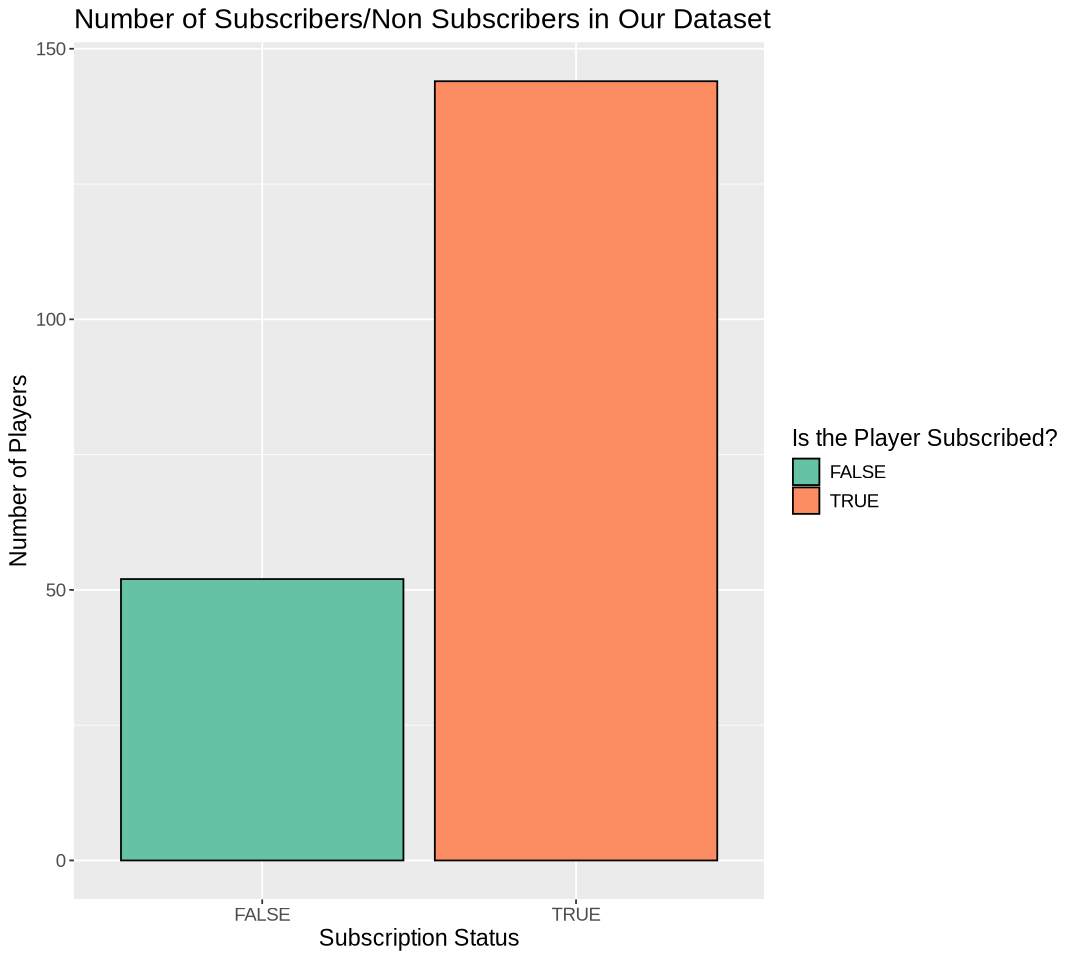

In [12]:
options(repr.plot.width = 9, repr.plot.height = 8)
sub_dist_plot <- ggplot(players, aes(x = subscribe, fill = subscribe)) +
  geom_bar(stat = "count", color = "black", na.rm = TRUE) +
  labs(
    x = "Subscription Status",
    y = "Number of Players",
    title = "Number of Subscribers/Non Subscribers in Our Dataset",
    fill = "Is the Player Subscribed?") +
    theme(text = element_text(size = 14)) +
    scale_fill_brewer(palette = "Set2")

sub_dist_plot

This visualization shows that in our dataset, far more individuals are subscribed to a game-related newsletter than not. In terms of a K-NN classification algorithm, this means that we may deal with **class imbalance** (for a K-NN classifier).

### (4) Methods and Plan

To answer my predictive question, I will implement the K-NN classification algorithm, using 'Age' and 'played_hours' as the predictors for the response variable: 'subscribed'. This method is appropriate as it can help capture any non-linearity in the relationship between our variables (no functional form assumed).

A key assumption for this method is that similar observations in Euclidean distance will share similar characteristics for classification variables (such as subscription status).

A potential limitation with this method is that if there are major imbalances between our two classes, we must scale up classes to make sure that a majority vote isn't influenced by class frequency.

I am going to process the data by first filtering player.csv by splitting it into a training and testing dataset (75% training and 25% testing). Then, I will rescale and recenter the variables in each to make sure they are all comparable in the K-NN algorithm and contribute equally to the distance measures. To compare and select the K that avoids overfitting/underfitting for the model, I will use 5-fold cross-validation.

To address the second part of my research question, I will be repeating this process from above, but filtering first by Minecraft experience level and doing the analysis separately for each level. Comparing the accuracy of each of these classifiers will show how the predictive strength changes between experience level groups.

### (5) GitHub Repository

https://github.com/Finnypiney/individual_project_finnp